<a href="https://www.kaggle.com/code/feezakhankhanzada/exploratory-data-analysis-ft-season-and-age-group?scriptVersionId=99832450" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd

train = pd.read_csv('../input/h-and-m-personalized-fashion-recommendations/transactions_train.csv')
customer = pd.read_csv('../input/h-and-m-personalized-fashion-recommendations/customers.csv')
article = pd.read_csv('../input/h-and-m-personalized-fashion-recommendations/articles.csv')

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.express as px
import plotly.graph_objects as go
init_notebook_mode(connected=True)
from datetime import datetime

In [3]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


# *Customer Age Related Data Analysis*

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='age', ylabel='Density'>

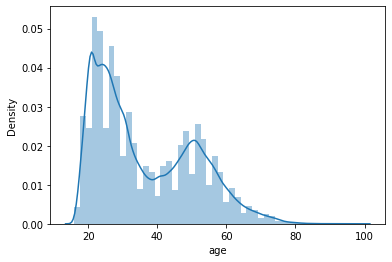

In [4]:
sns.distplot(customer['age'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='age'>

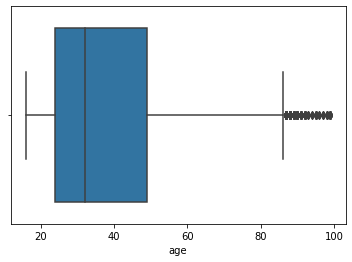

In [5]:
sns.boxplot(customer['age'])

In [6]:
customer['age'].describe()

count    1.356119e+06
mean     3.638696e+01
std      1.431363e+01
min      1.600000e+01
25%      2.400000e+01
50%      3.200000e+01
75%      4.900000e+01
max      9.900000e+01
Name: age, dtype: float64

In [7]:
customer.shape[0] - customer.age.count()

15861

In [8]:
customer.loc[customer.age.isnull() , 'age'] = 0

In [9]:
from datetime import datetime
train["t_dat"] = pd.to_datetime(train["t_dat"])

In [10]:
train['month'] =  pd.DatetimeIndex(train['t_dat']).month

In [11]:
customer.isnull().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                            0
postal_code                    0
dtype: int64

In [12]:
train.loc[(train["month"] >= 3) & (train["month"] <= 5) , "season"] = "Spring"
train.loc[(train["month"] >= 6) & (train["month"] <= 8) , "season"] = "Summer"
train.loc[(train["month"] >= 9) & (train["month"] <= 11) , "season"] = "Autumn"
train.loc[(train["month"] == 12) , "season"] = "Winter"
train.loc[(train["month"] >= 1) & (train["month"] <= 2) , "season"] = "Winter"

In [13]:
SA = train[['season' , 'article_id']].merge(article[['article_id' , 'product_type_name' , 'product_type_no']] , on = 'article_id').groupby(['season' , 'product_type_no' ,'product_type_name']).agg({'product_type_no': 'count'}).rename(columns={'product_type_no': 'quantity'}).reset_index()

In [14]:
fig = px.pie(SA.loc[SA.season == "Winter"].sort_values(by = 'quantity', ascending = False).head(10),
             values='quantity', 
             title='Winter Top 10 Product',
             names='product_type_name',
             color_discrete_sequence=px.colors.sequential.RdBu,
             hover_data=['product_type_name'],
             labels={'product_type_name':'Product Type Name'},
            height=450)

fig.show()

fig = px.pie(SA.loc[SA.season == "Summer"].sort_values(by = 'quantity', ascending = False).head(10),
             values='quantity', 
             title='Summer Top 10 Product',
             names='product_type_name',
             color_discrete_sequence=px.colors.sequential.RdBu,
             hover_data=['product_type_name'],
             labels={'product_type_name':'Product Type Name'},
            height=450)

fig.show()

fig = px.pie(SA.loc[SA.season == "Spring"].sort_values(by = 'quantity', ascending = False).head(10),
             values='quantity', 
             title='Spring Top 10 Product',
             names='product_type_name',
             color_discrete_sequence=px.colors.sequential.RdBu,
             hover_data=['product_type_name'],
             labels={'product_type_name':'Product Type Name'},
            height=450)

fig.show()

fig = px.pie(SA.loc[SA.season == "Autumn"].sort_values(by = 'quantity', ascending = False).head(10),
             values='quantity', 
             title='Autumn Top 10 Product',
             names='product_type_name',
             color_discrete_sequence=px.colors.sequential.RdBu,
             hover_data=['product_type_name'],
             labels={'product_type_name':'Product Type Name'},
            height=450)

fig.show()

In [15]:
fig = px.bar(SA.loc[SA.season == "Winter"].sort_values(by = 'quantity', ascending = False),
             y='quantity', 
             title='Winter Sale in Descending Order',
             x='product_type_name',
             color_discrete_sequence=px.colors.sequential.RdBu,
             hover_data=['product_type_name'],
             labels={'product_type_name':'Product Type Name'},
            height=450)
fig.show()

fig = px.bar(SA.loc[SA.season == "Summer"].sort_values(by = 'quantity', ascending = False),
             y='quantity', 
             title='Summer Sale in Descending Order',
             x='product_type_name',
             color_discrete_sequence=px.colors.sequential.RdBu,
             hover_data=['product_type_name'],
             labels={'product_type_name':'Product Type Name'},
            height=450)
fig.show()

fig = px.bar(SA.loc[SA.season == "Spring"].sort_values(by = 'quantity', ascending = False),
             y='quantity', 
             title='Spring Sale in Descending Order',
             x='product_type_name',
             color_discrete_sequence=px.colors.sequential.RdBu,
             hover_data=['product_type_name'],
             labels={'product_type_name':'Product Type Name'},
            height=450)
fig.show()

fig = px.bar(SA.loc[SA.season == "Autumn"].sort_values(by = 'quantity', ascending = False),
             y='quantity', 
             title='Autumn Sale in Descending Order',
             x='product_type_name',
             color_discrete_sequence=px.colors.sequential.RdBu,
             hover_data=['product_type_name'],
             labels={'product_type_name':'Product Type Name'},
            height=450)
fig.show()

In [16]:
import numpy as np
bins = np.array([0,15,19,35,50,99])

In [17]:
labels = ['unknown' , 'teens' , 'young' , 'middle-aged' , 'old']

In [18]:
customer['age_cat'] = pd.cut(customer['age'], bins=bins, labels=labels, include_lowest=True)

In [19]:
CA = customer[['customer_id' , 'age_cat']].merge(train[['customer_id' , 'season']] , on = 'customer_id').groupby(['season' , 'age_cat']).agg({'age_cat': 'count'}).rename(columns={'age_cat': 'quantity'}).reset_index()

In [20]:
fig = px.pie(CA.loc[CA.season == "Winter"].sort_values(by = 'quantity', ascending = False).head(10),
             values='quantity', 
             title='Winter Top Buyers',
             names='age_cat',
             color_discrete_sequence=px.colors.sequential.RdBu,
             hover_data=['age_cat'],
             labels={'age_cat':'Category'},
            height=450)

fig.show()

fig = px.pie(CA.loc[CA.season == "Summer"].sort_values(by = 'quantity', ascending = False).head(10),
             values='quantity', 
             title='Summer Top Buyers',
             names='age_cat',
             color_discrete_sequence=px.colors.sequential.RdBu,
             hover_data=['age_cat'],
             labels={'age_cat':'Category'},
            height=450)

fig.show()

fig = px.pie(CA.loc[CA.season == "Spring"].sort_values(by = 'quantity', ascending = False).head(10),
             values='quantity', 
             title='Spring Top Buyers',
             names='age_cat',
             color_discrete_sequence=px.colors.sequential.RdBu,
             hover_data=['age_cat'],
             labels={'age_cat':'Category'},
            height=450)

fig.show()

fig = px.pie(CA.loc[CA.season == "Autumn"].sort_values(by = 'quantity', ascending = False).head(10),
             values='quantity', 
             title='Autumn Top Buyers',
             names='age_cat',
             color_discrete_sequence=px.colors.sequential.RdBu,
             hover_data=['age_cat'],
             labels={'age_cat':'Category'},
            height=450)

fig.show()

In [21]:
article[['perceived_colour_value_name' , 'perceived_colour_master_name']]

,perceived_colour_value_name,perceived_colour_master_name
0,Dark,Black
1,Light,White
2,Dusty Light,White
3,Dark,Black
4,Light,White
...,...,...
105537,Dark,Black
105538,Dark,Black
105539,Dark,Black
105540,Dark,Black


In [22]:
article['perceived_colour_value_name'].unique()

array(['Dark', 'Light', 'Dusty Light', 'Medium Dusty', 'Bright', 'Medium',
       'Undefined', 'Unknown'], dtype=object)

In [23]:
article['perceived_colour_master_name'].unique()

array(['Black', 'White', 'Beige', 'Grey', 'Blue', 'Pink', 'Lilac Purple',
       'Red', 'Mole', 'Orange', 'Metal', 'Brown', 'Turquoise', 'Yellow',
       'Khaki green', 'Green', 'undefined', 'Unknown', 'Yellowish Green',
       'Bluish Green'], dtype=object)

In [24]:
SC = train[['season' , 'article_id']].merge(article[['article_id' , 'perceived_colour_master_name']] , on = 'article_id').groupby(['season' , 'perceived_colour_master_name']).agg({'perceived_colour_master_name': 'count'}).rename(columns={'perceived_colour_master_name': 'quantity'}).reset_index()

In [25]:
fig = px.bar(SC.loc[SC.season == "Winter"].sort_values(by = 'quantity', ascending = False),
             y='quantity', 
             title='Winter Most Favourite Colors in Ascending Order',
             x='perceived_colour_master_name',
             color_discrete_sequence=px.colors.sequential.RdBu,
             hover_data=['perceived_colour_master_name'],
             labels={'perceived_colour_master_name':'Colour'},
            height=450)
fig.show()

fig = px.bar(SC.loc[SC.season == "Summer"].sort_values(by = 'quantity', ascending = False),
             y='quantity', 
             title='Summer Most Favourite Colors in Ascending Order',
             x='perceived_colour_master_name',
             color_discrete_sequence=px.colors.sequential.RdBu,
             hover_data=['perceived_colour_master_name'],
             labels={'perceived_colour_master_name':'Colour'},
            height=450)
fig.show()

fig = px.bar(SC.loc[SC.season == "Spring"].sort_values(by = 'quantity', ascending = False),
             y='quantity', 
             title='Spring Most Favourite Colors in Ascending Order',
             x='perceived_colour_master_name',
             color_discrete_sequence=px.colors.sequential.RdBu,
             hover_data=['perceived_colour_master_name'],
             labels={'perceived_colour_master_name':'Colour'},
            height=450)
fig.show()

fig = px.bar(SC.loc[SC.season == "Autumn"].sort_values(by = 'quantity', ascending = False),
             y='quantity', 
             title='Autumn Most Favourite Colors in Ascending Order',
             x='perceived_colour_master_name',
             color_discrete_sequence=px.colors.sequential.RdBu,
             hover_data=['perceived_colour_master_name'],
             labels={'perceived_colour_master_name':'Colour'},
            height=450)
fig.show()


In [26]:
article['product_group_name'].unique()

array(['Garment Upper body', 'Underwear', 'Socks & Tights',
       'Garment Lower body', 'Accessories', 'Items', 'Nightwear',
       'Unknown', 'Underwear/nightwear', 'Shoes', 'Swimwear',
       'Garment Full body', 'Cosmetic', 'Interior textile', 'Bags',
       'Furniture', 'Garment and Shoe care', 'Fun', 'Stationery'],
      dtype=object)

In [27]:
AC = train[['customer_id' , 'article_id']].merge(article[['article_id' , 'perceived_colour_master_name']] , on = 'article_id').merge(customer[['customer_id' , 'age_cat']] , on = 'customer_id').groupby(['age_cat' , 'perceived_colour_master_name']).agg({'perceived_colour_master_name': 'count'}).rename(columns={'perceived_colour_master_name': 'quantity'}).reset_index()

In [28]:
fig = px.bar(AC.loc[AC.age_cat == "teens"].sort_values(by = 'quantity', ascending = False),
             y='quantity', 
             title='Teens Most Favourite Colors in Ascending Order',
             x='perceived_colour_master_name',
             color_discrete_sequence=px.colors.sequential.RdBu,
             hover_data=['perceived_colour_master_name'],
             labels={'perceived_colour_master_name':'Colour'},
            height=450)
fig.show()

fig = px.bar(AC.loc[AC.age_cat == "young"].sort_values(by = 'quantity', ascending = False),
             y='quantity', 
             title='Youngs Most Favourite Colors in Ascending Order',
             x='perceived_colour_master_name',
             color_discrete_sequence=px.colors.sequential.RdBu,
             hover_data=['perceived_colour_master_name'],
             labels={'perceived_colour_master_name':'Colour'},
            height=450)
fig.show()

fig = px.bar(AC.loc[AC.age_cat == "middle-aged"].sort_values(by = 'quantity', ascending = False),
             y='quantity', 
             title='Middle-Aged Most Favourite Colors in Ascending Order',
             x='perceived_colour_master_name',
             color_discrete_sequence=px.colors.sequential.RdBu,
             hover_data=['perceived_colour_master_name'],
             labels={'perceived_colour_master_name':'Colour'},
            height=450)
fig.show()

fig = px.bar(AC.loc[AC.age_cat == "old"].sort_values(by = 'quantity', ascending = False),
             y='quantity', 
             title='Old Most Favourite Colors in Ascending Order',
             x='perceived_colour_master_name',
             color_discrete_sequence=px.colors.sequential.RdBu,
             hover_data=['perceived_colour_master_name'],
             labels={'perceived_colour_master_name':'Colour'},
            height=450)
fig.show()

fig = px.bar(AC.loc[AC.age_cat == "unknown"].sort_values(by = 'quantity', ascending = False),
             y='quantity', 
             title='unknown Most Favourite Colors in Ascending Order',
             x='perceived_colour_master_name',
             color_discrete_sequence=px.colors.sequential.RdBu,
             hover_data=['perceived_colour_master_name'],
             labels={'perceived_colour_master_name':'Colour'},
            height=450)
fig.show()

